In [1]:
import pandas as pd

df = pd.read_csv('C:/Lohit/New folder/Updated_Starbucks_Order_Data_with_Missing_Values.csv')

df.head()

,worker_id,department,location,order_detail,shift,season,detailed_order,office_location,assigned_starbucks,adjusted_order_time,adjusted_pickup_time,prep_time_minutes,time_slot,expected_wait_time_minutes
0,1,Sales,Starbucks_2,Latte - Oat Milk - Sweetener - Large - Caramel...,Morning,Fall,Small - Almond Milk - Extra Sweetener - Flavor...,Office_E,Starbucks_3,2025-03-08 08:57:00,2025-03-08 09:10:00,4.0,Morning Rush (8:00 AM - 10:00 AM),6
1,2,Marketing,Starbucks_3,Frappuccino - Soy Milk - Extra Sweetener - Med...,Evening,Fall,Large - Almond Milk - Sweetener - None,Office_E,Starbucks_3,2025-03-08 16:26:00,2025-03-08 16:32:00,5.0,Midday (10:00 AM - 12:00 PM),6
2,3,Engineering,Starbucks_1,Latte - Coconut Milk - Extra Sweetener - Small...,Morning,Winter,Small - Regular - No Sugar - None,Office_E,Starbucks_3,2025-03-08 09:42:00,2025-03-08 09:54:00,4.0,NaN,6
3,4,Support,Starbucks_2,Latte - Coconut Milk - Sweetener - Small - None,Evening,Winter,Large - Regular - Extra Sweetener - None,Office_A,Starbucks_2,2025-03-08 16:52:00,2025-03-08 17:11:00,3.0,Afternoon (12:00 PM - 2:00 PM),5
4,5,Finance,Starbucks_2,Mocha - Regular - Sweetener - Large - Flavored...,Evening,Summer,Small - Oat Milk - No Sugar - None,Office_A,Starbucks_1,2025-03-08 16:57:00,2025-03-08 17:14:00,5.0,Afternoon (12:00 PM - 2:00 PM),7


In [13]:
df.shape

(10000, 14)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   worker_id                   10000 non-null  int64  
 1   department                  10000 non-null  object 
 2   location                    10000 non-null  object 
 3   order_detail                9000 non-null   object 
 4   shift                       10000 non-null  object 
 5   season                      9000 non-null   object 
 6   detailed_order              10000 non-null  object 
 7   office_location             10000 non-null  object 
 8   assigned_starbucks          10000 non-null  object 
 9   adjusted_order_time         10000 non-null  object 
 10  adjusted_pickup_time        9300 non-null   object 
 11  prep_time_minutes           9500 non-null   float64
 12  time_slot                   9500 non-null   object 
 13  expected_wait_time_minutes  1000

In [4]:
df['adjusted_order_time'] = pd.to_datetime(df['adjusted_order_time'])
df['adjusted_pickup_time'] = pd.to_datetime(df['adjusted_pickup_time'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   worker_id                   10000 non-null  int64         
 1   department                  10000 non-null  object        
 2   location                    10000 non-null  object        
 3   order_detail                9000 non-null   object        
 4   shift                       10000 non-null  object        
 5   season                      9000 non-null   object        
 6   detailed_order              10000 non-null  object        
 7   office_location             10000 non-null  object        
 8   assigned_starbucks          10000 non-null  object        
 9   adjusted_order_time         10000 non-null  datetime64[ns]
 10  adjusted_pickup_time        9300 non-null   datetime64[ns]
 11  prep_time_minutes           9500 non-null   float64    

In [16]:
missing_values = df.isnull().sum()

missing_values.sort_values(ascending=False)

season                        1000
order_detail                  1000
adjusted_pickup_time           700
prep_time_minutes              500
time_slot                      500
department                       0
shift                            0
location                         0
worker_id                        0
detailed_order                   0
adjusted_order_time              0
assigned_starbucks               0
office_location                  0
expected_wait_time_minutes       0
dtype: int64

In [12]:
missing_time_slot = df[df['time_slot'].isnull()]

missing_time_slot.shape

(500, 14)

In [25]:
def impute_time_slot(row):
    if pd.isna(row['time_slot']):
        hour = row['adjusted_order_time'].hour
        if 8 <= hour <10:
            return 'Morning Rush (8:00 AM - 10:00 AM)'
        elif 10<= hour <12:
            return 'Midday (10:00 AM - 12:00 PM)'
        elif 12 <= hour < 14:
            return 'Afternoon (12:00 PM - 2:00 PM)'
        elif 14 <= hour < 16:
            return 'Afternoon (2:00 PM - 4:00 PM)'
        elif 16 <= hour < 18:
            return 'Evening (4:00 PM - 6:00 PM)'
        else:
            return 'Late Evening (6:00 PM - 8:00 PM)'
    return row['time_slot']

df['time_slot'] = df.apply(impute_time_slot,axis=1)

prep_time_median = df['prep_time_minutes'].median()
df['prep_time_minutes'].fillna(prep_time_median)

# Impute missing values in 'season' with 'Unknown'
df['season'].fillna('Unknown')

# Drop rows where 'order_detail' is still missing, as it is essential for modeling
df.dropna(subset=['order_detail'])

# Check for any remaining missing values
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

worker_id                       0
department                      0
location                        0
order_detail                    0
shift                           0
season                          0
detailed_order                  0
office_location                 0
assigned_starbucks              0
adjusted_order_time             0
adjusted_pickup_time          639
prep_time_minutes               0
time_slot                       0
expected_wait_time_minutes      0
dtype: int64

In [26]:
# Impute missing adjusted_pickup_time by adding prep_time_minutes to adjusted_order_time
df['adjusted_pickup_time'] = df['adjusted_pickup_time'].fillna(
    df['adjusted_order_time'] + pd.to_timedelta(df['prep_time_minutes'], unit='m')
)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   worker_id                   9000 non-null   int64         
 1   department                  9000 non-null   object        
 2   location                    9000 non-null   object        
 3   order_detail                9000 non-null   object        
 4   shift                       9000 non-null   object        
 5   season                      9000 non-null   object        
 6   detailed_order              9000 non-null   object        
 7   office_location             9000 non-null   object        
 8   assigned_starbucks          9000 non-null   object        
 9   adjusted_order_time         9000 non-null   datetime64[ns]
 10  adjusted_pickup_time        9000 non-null   datetime64[ns]
 11  prep_time_minutes           9000 non-null   float64       
 1

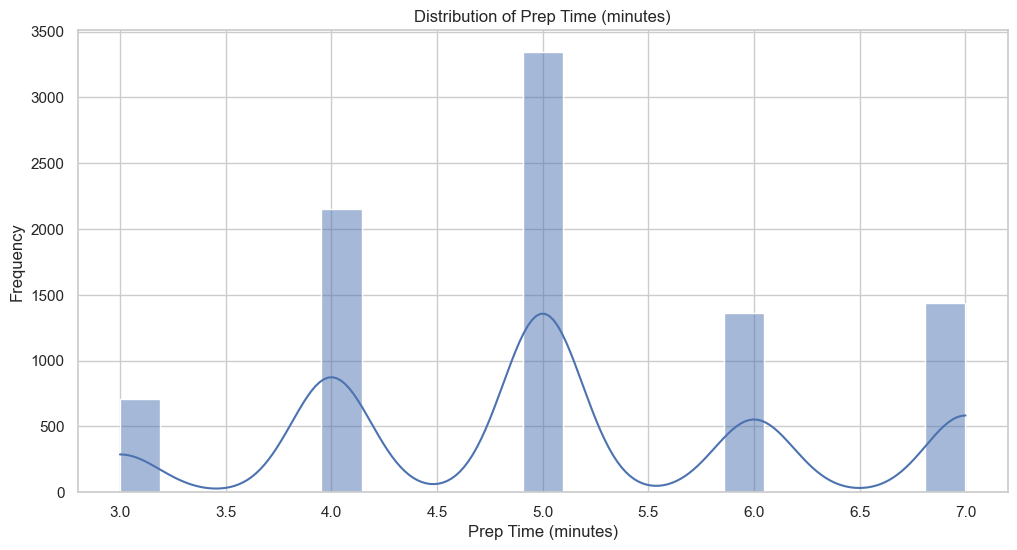

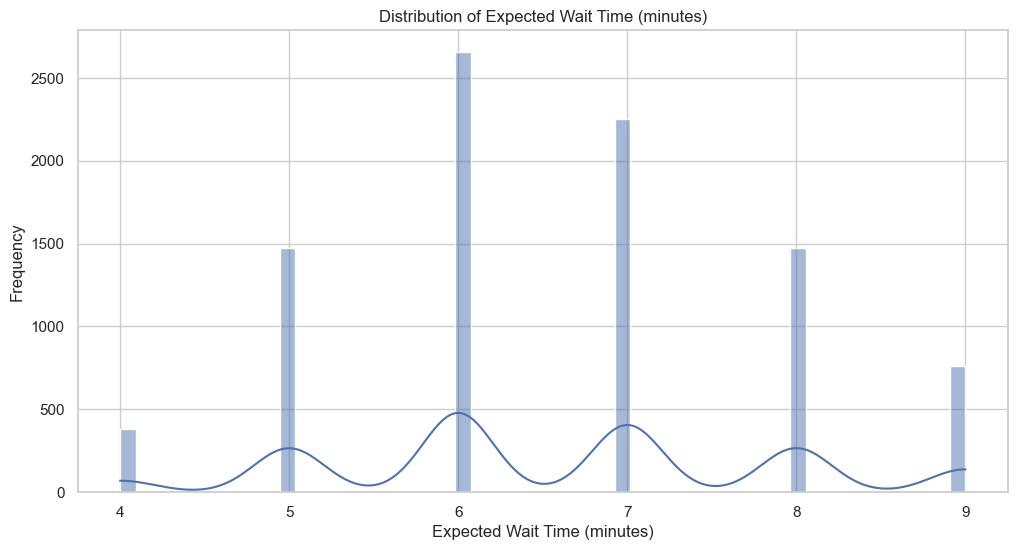

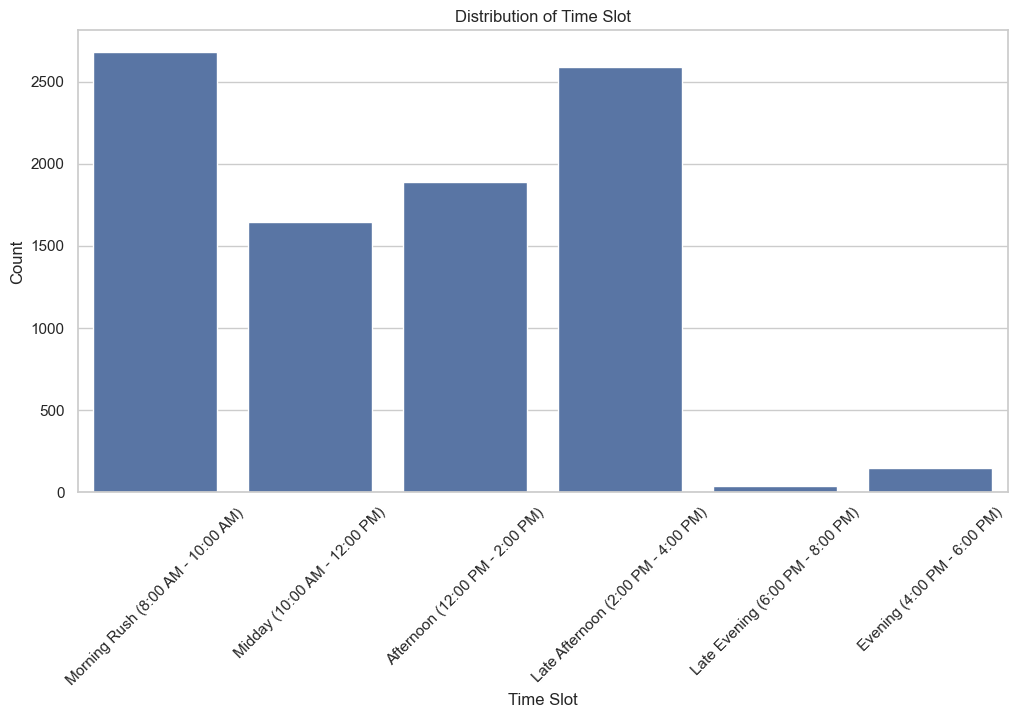

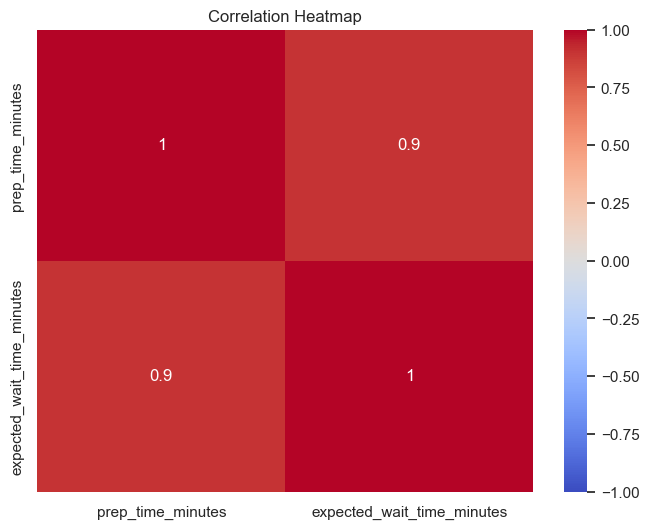

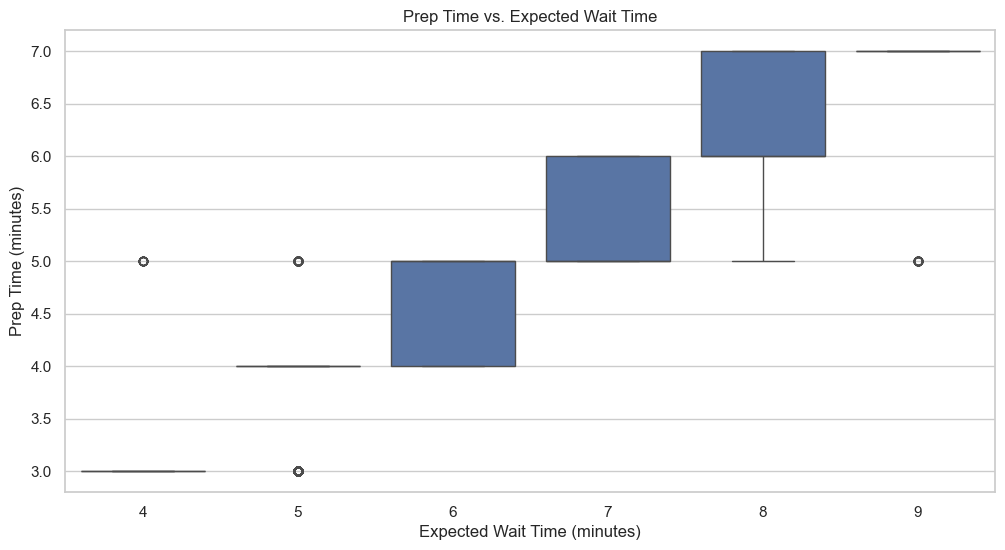

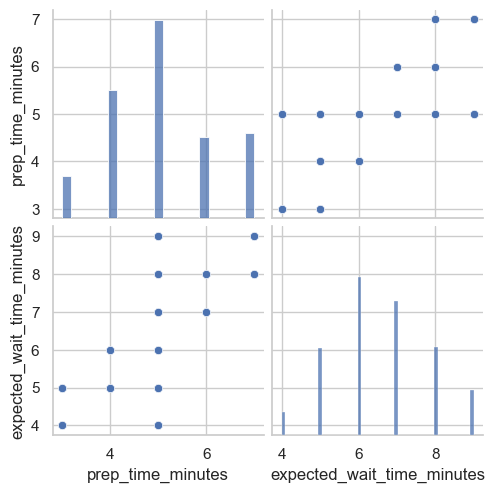

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Check the distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(df['prep_time_minutes'], kde=True)
plt.title('Distribution of Prep Time (minutes)')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['expected_wait_time_minutes'], kde=True)
plt.title('Distribution of Expected Wait Time (minutes)')
plt.xlabel('Expected Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# 2. Countplot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='time_slot', data=df)
plt.title('Distribution of Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 3. Correlation Heatmap for numerical variables
correlation_matrix = df[['prep_time_minutes', 'expected_wait_time_minutes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 4. Boxplot for prep_time_minutes vs. expected_wait_time_minutes
plt.figure(figsize=(12, 6))
sns.boxplot(x='expected_wait_time_minutes', y='prep_time_minutes', data=df)
plt.title('Prep Time vs. Expected Wait Time')
plt.xlabel('Expected Wait Time (minutes)')
plt.ylabel('Prep Time (minutes)')
plt.show()

# 5. Pairplot to see relationships between numerical features
sns.pairplot(df[['prep_time_minutes', 'expected_wait_time_minutes']])
plt.show()


In [33]:
# Calculate IQR for 'prep_time_minutes' and 'expected_wait_time_minutes'
Q1_prep = df['prep_time_minutes'].quantile(0.25)
Q3_prep = df['prep_time_minutes'].quantile(0.75)
IQR_prep = Q3_prep - Q1_prep

# Define outlier bounds for 'prep_time_minutes'
lower_bound_prep = Q1_prep - 1.5 * IQR_prep
upper_bound_prep = Q3_prep + 1.5 * IQR_prep

# Identify outliers in 'prep_time_minutes'
outliers_prep = df[(df['prep_time_minutes'] < lower_bound_prep) | 
                               (df['prep_time_minutes'] > upper_bound_prep)]

# Calculate IQR for 'expected_wait_time_minutes'
Q1_wait = df['expected_wait_time_minutes'].quantile(0.25)
Q3_wait = df['expected_wait_time_minutes'].quantile(0.75)
IQR_wait = Q3_wait - Q1_wait

# Define outlier bounds for 'expected_wait_time_minutes'
lower_bound_wait = Q1_wait - 1.5 * IQR_wait
upper_bound_wait = Q3_wait + 1.5 * IQR_wait

# Identify outliers in 'expected_wait_time_minutes'
outliers_wait = df[(df['expected_wait_time_minutes'] < lower_bound_wait) | 
                               (df['expected_wait_time_minutes'] > upper_bound_wait)]

# Display the number of outliers in each column
print(f'Number of outliers in prep_time_minutes: {outliers_prep.shape[0]}')
print(f'Number of outliers in expected_wait_time_minutes: {outliers_wait.shape[0]}')

# Optionally, display the outlier data points
# print(outliers_prep)
# print(outliers_wait)


Number of outliers in prep_time_minutes: 0
Number of outliers in expected_wait_time_minutes: 1148


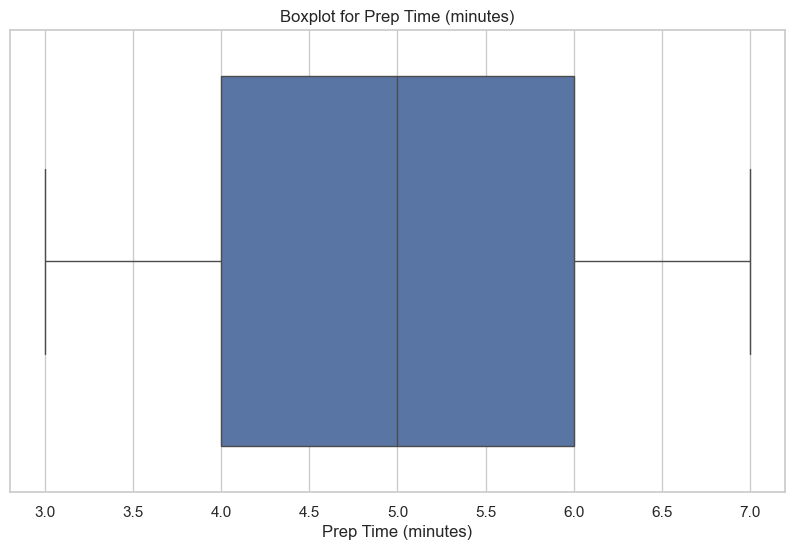

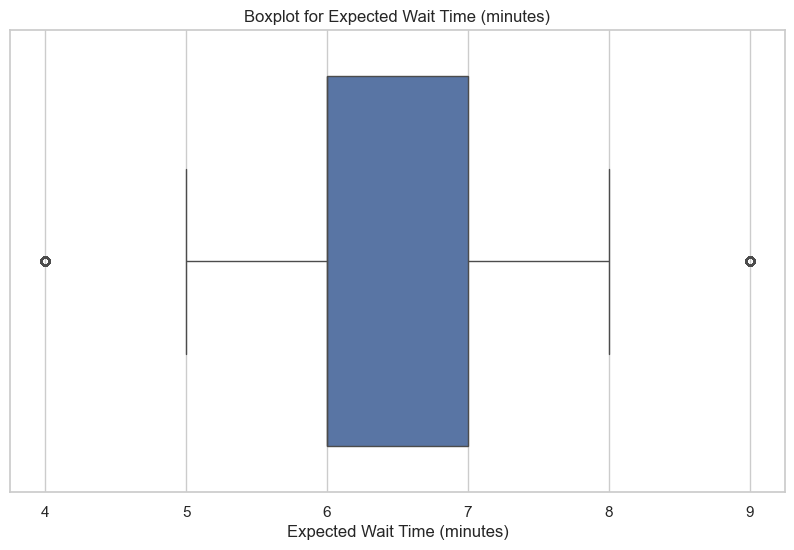

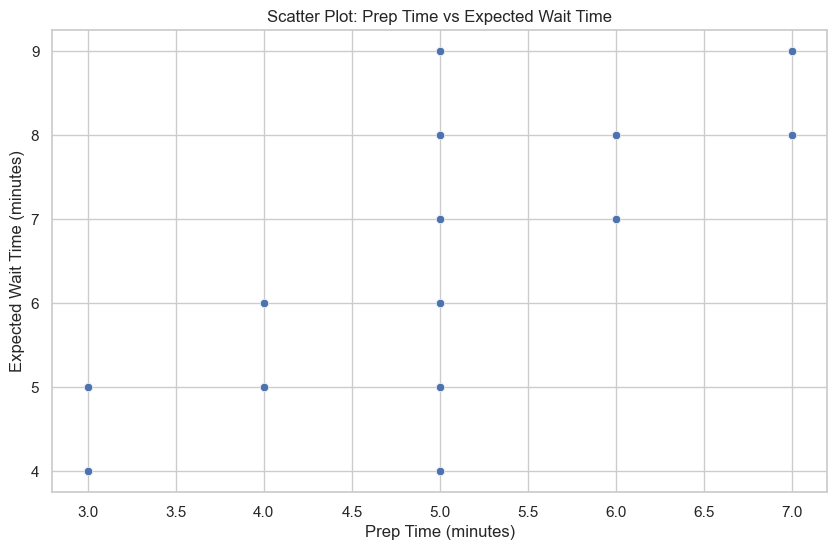

In [35]:

# 1. Boxplot for prep_time_minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['prep_time_minutes'])
plt.title('Boxplot for Prep Time (minutes)')
plt.xlabel('Prep Time (minutes)')
plt.show()

# 2. Boxplot for expected_wait_time_minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['expected_wait_time_minutes'])
plt.title('Boxplot for Expected Wait Time (minutes)')
plt.xlabel('Expected Wait Time (minutes)')
plt.show()

# 3. Scatter plot to inspect relationship between prep_time_minutes and expected_wait_time_minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time_minutes', y='expected_wait_time_minutes', data=df)
plt.title('Scatter Plot: Prep Time vs Expected Wait Time')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Expected Wait Time (minutes)')
plt.show()

In [37]:
# Remove outliers from expected_wait_time_minutes using IQR method (for example, values beyond 90th percentile)
upper_limit_wait = df['expected_wait_time_minutes'].quantile(0.9)
df_cleaned = df[df['expected_wait_time_minutes'] <= upper_limit_wait]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8236 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   worker_id                   8236 non-null   int64         
 1   department                  8236 non-null   object        
 2   location                    8236 non-null   object        
 3   order_detail                8236 non-null   object        
 4   shift                       8236 non-null   object        
 5   season                      8236 non-null   object        
 6   detailed_order              8236 non-null   object        
 7   office_location             8236 non-null   object        
 8   assigned_starbucks          8236 non-null   object        
 9   adjusted_order_time         8236 non-null   datetime64[ns]
 10  adjusted_pickup_time        8236 non-null   datetime64[ns]
 11  prep_time_minutes           8236 non-null   float64       
 1

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Define numeric and categorical columns
numeric_features = ['prep_time_minutes', 'expected_wait_time_minutes']
categorical_features = ['shift', 'time_slot', 'season']

# Create a column transformer to handle both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessor pipeline to the features
X = df_cleaned.drop(columns=['adjusted_pickup_time'])
y = df_cleaned['adjusted_pickup_time']


In [39]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with preprocessing and a RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 2104620955569.7087
Mean Squared Error (MSE): 6.30270061861949e+24
R^2 Score: 0.9603366939463744


In [40]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10, None],
}

# Set up GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'regressor__max_depth': 5, 'regressor__n_estimators': 200}


In [45]:
df.drop(columns=['pickup_time_difference'], inplace=False)

,worker_id,department,location,order_detail,shift,season,detailed_order,office_location,assigned_starbucks,adjusted_order_time,adjusted_pickup_time,prep_time_minutes,time_slot,expected_wait_time_minutes
0,1,Sales,Starbucks_2,Latte - Oat Milk - Sweetener - Large - Caramel...,Morning,Fall,Small - Almond Milk - Extra Sweetener - Flavor...,Office_E,Starbucks_3,2025-03-08 08:57:00,2025-03-08 09:10:00,4.0,Morning Rush (8:00 AM - 10:00 AM),6
1,2,Marketing,Starbucks_3,Frappuccino - Soy Milk - Extra Sweetener - Med...,Evening,Fall,Large - Almond Milk - Sweetener - None,Office_E,Starbucks_3,2025-03-08 16:26:00,2025-03-08 16:32:00,5.0,Midday (10:00 AM - 12:00 PM),6
2,3,Engineering,Starbucks_1,Latte - Coconut Milk - Extra Sweetener - Small...,Morning,Winter,Small - Regular - No Sugar - None,Office_E,Starbucks_3,2025-03-08 09:42:00,2025-03-08 09:54:00,4.0,Morning Rush (8:00 AM - 10:00 AM),6
3,4,Support,Starbucks_2,Latte - Coconut Milk - Sweetener - Small - None,Evening,Winter,Large - Regular - Extra Sweetener - None,Office_A,Starbucks_2,2025-03-08 16:52:00,2025-03-08 17:11:00,3.0,Afternoon (12:00 PM - 2:00 PM),5
4,5,Finance,Starbucks_2,Mocha - Regular - Sweetener - Large - Flavored...,Evening,Summer,Small - Oat Milk - No Sugar - None,Office_A,Starbucks_1,2025-03-08 16:57:00,2025-03-08 17:14:00,5.0,Afternoon (12:00 PM - 2:00 PM),7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,HR,Starbucks_1,Latte - Almond Milk - No Sugar - Small - Caram...,Morning,Spring,Small - Soy Milk - Regular Sugar - None,Office_E,Starbucks_1,2025-03-08 09:30:00,2025-03-08 09:41:00,3.0,Midday (10:00 AM - 12:00 PM),4
9996,9997,Support,Starbucks_1,Coffee - Coconut Milk - Extra Sweetener - Larg...,Morning,Winter,Large - Oat Milk - Regular Sugar - None,Office_D,Starbucks_2,2025-03-08 09:26:00,2025-03-08 09:31:00,4.0,Morning Rush (8:00 AM - 10:00 AM),6
9997,9998,Sales,Starbucks_3,Tea - Soy Milk - No Sugar - Small - Flavored S...,Evening,Winter,Medium - Oat Milk - Sweetener - None,Office_B,Starbucks_3,2025-03-08 17:49:00,2025-03-08 18:06:00,6.0,Late Afternoon (2:00 PM - 4:00 PM),7
9998,9999,Operations,Starbucks_3,Cappuccino - Regular - Sweetener - Small - Car...,Morning,Fall,Small - Almond Milk - Regular Sugar - Extra Shot,Office_D,Starbucks_1,2025-03-08 09:32:00,2025-03-08 09:40:00,3.0,Late Afternoon (2:00 PM - 4:00 PM),5


In [46]:
# Create a new target variable (time difference)
df_cleaned['pickup_time_difference'] = (df_cleaned['adjusted_pickup_time'] - df_cleaned['adjusted_order_time']).dt.total_seconds() / 60  # convert to minutes
y = df_cleaned['pickup_time_difference']


C:\Users\lohit\AppData\Local\Temp\ipykernel_19236\3806722008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pickup_time_difference'] = (df_cleaned['adjusted_pickup_time'] - df_cleaned['adjusted_order_time']).dt.total_seconds() / 60  # convert to minutes


In [47]:
import numpy as np
y_log = np.log1p(y)  # Apply log transformation to target variable

In [48]:
# Split the data into training and testing sets again with the transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create and train the pipeline with the transformed target
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = model_pipeline.predict(X_test)

# Inverse the log transformation to get the actual values
y_pred = np.expm1(y_pred_log)  # This is the inverse of log1p

# Inverse the target variable (y) as well
y_test_actual = np.expm1(y_test)  # This is the inverse of log1p for the actual values

# Evaluate the model's performance using MAE, MSE, and R²
mae_2 = mean_absolute_error(y_test_actual, y_pred)
mse_2 = mean_squared_error(y_test_actual, y_pred)
r2_2 = r2_score(y_test_actual, y_pred)

print(f'Mean Absolute Error (MAE): {mae_2}')
print(f'Mean Squared Error (MSE): {mse_2}')
print(f'R² Score: {r2_2}')


Mean Absolute Error (MAE): 4.168805204136221
Mean Squared Error (MSE): 23.793128554989003
R² Score: -0.13334713537106202
